# CHAPEL HILL CRIME DATA
We were focusing on analysing the Crime dataset provided by the Department of Police Chapel Hill from 2010-01-01, 2019-06-29. We particularly considered the "Police Incidents Reports Written" dataset since it contains all incident reported which can be used to predict the future incident occurences using Time Series Analysis(Statistical Time Series Models and Neural Networks).

Altogether this dataset contains 70,171 rows and 18 columns.

## Data Manupulation, Data Mapping, Piecharts, Word Clouds, Time Series, Time Series and Crime Prediction with Neural Network

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
sns.set_style('whitegrid')
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

### Data Preprocessing
Load the data and set date as the index. Drop uninterested columns Date of Report', 'Date of Occurrence', 'Date Found','Incident ID', 'City','Date of Occurrence','Victim Race','Agency','State'

In [2]:
incident_report = pd.read_csv('https://query.data.world/s/x2qxlyf4bqsvd4rv3vt4bzkhsdtzuc', sep = ';')

incident_report = incident_report.drop(incident_report['City']
                                     [incident_report['City']!="CHAPEL HILL"].index)

incident_report['Date'] = pd.to_datetime(incident_report['Date of Report'])
incident_report = incident_report.set_index(incident_report['Date'])
incident_report = incident_report.sort_index()

incident_report = incident_report.drop(['Date of Report', 'Date of Occurrence', 'Date Found','Incident ID', 'City','Date of Occurrence','Victim Race','Agency','State'], axis =1)
incident_report.head()

,Offense,Street,Forcible,Zipcode,Reported As,Premise Description,Weapon Description,Victim Age,Victim Gender,latitude_longitude,Date
Date,,,,,,,,,,,
2010-01-01,SUSPICIOUS LETTER,134 MALLARD CT,N,27517,NaN,HOME OF VICTIM - SINGLE FAMILY,NaN,64.0,M,"35.88901697,-79.055725418",2010-01-01
2010-01-01,LARCENY- ALL OTHER,1726 LEGION RD,N,27517,NaN,HOME OF VICTIM - SINGLE FAMILY,NaN,44.0,M,"35.941190963,-79.014235046",2010-01-01
2010-01-01,INFORMATION,3 PENNY LANE,N,27516,NaN,HOME OF VICTIM - OTHER DWELLING,NaN,NaN,F,"35.925107971,-79.039284422",2010-01-01
2010-01-01,BURGLARY W/FORCE,529 HILLSBOROUGH STREET,Y,27514,NaN,HOME OF VICTIM - OTHER DWELLING,NaN,NaN,F,"35.922735953,-79.051485356",2010-01-01
2010-01-01,COMMUNICATING THREATS -INTIMIDATION NON PHYSI...,1600 E FRANKLIN ST,N,27514,NaN,RESTAURANT,NaN,38.0,M,"35.933200786,-79.031187337",2010-01-01


Lets consider data only for the year 2019 and make two more new columns containing the longitude and latitudes separtely. (in the original data set these were in one column separted by a comma)

In [3]:
data_2019 = incident_report['2019-01-01':'2019-12-31']
lon_lat = data_2019['latitude_longitude'].values.tolist()
latitude = []
longitude = []
for x in lon_lat:
    r = x.split(',')
    latitude.append(r[0])
    longitude.append(r[1])

data_2019['latitude'] = latitude
data_2019['longitude'] = longitude
data_2019 = data_2019.drop('latitude_longitude', axis =1)

## Mapping Data(Folium library)
Distribution of the incident occurences in the Chapel Hill area. According ton the map the incidents were reported from all over the region but highly in the **North Side** specially besides **East Main Street**. 

In [4]:
data_map1 = pd.DataFrame()
data_map1['Reported As'] = data_2019['Reported As']
data_map1['latitude'] = data_2019['latitude']
data_map1['longitude'] = data_2019['longitude']
data_map1 = data_map1.dropna()

data_map1 = data_map1.reset_index()

# get the first 100 crimes in the df_incidents dataframe
limit = 1000
data_map1_limited = data_map1.iloc[0:limit, :]

#data_map1_limited = data_map1
data_map1_limited['lon'] = data_map1_limited['longitude'].astype(float)
data_map1_limited['lat'] = data_map1_limited['latitude'].astype(float)

# instantiate a feature group for the incidents in the dataframe

world_map = folium.Map()
# Chapel Hill latitude and longitude values
latitude = 35.9132
longitude = -79.0558

# create map and display it
Chapel_hill_map1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of Chapel_hill_map
#Chapel_hill_map


incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(data_map1_limited['lat'], data_map1_limited['lon']):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Chapel_hill_map1.add_child(incidents)
Chapel_hill_map1

### Distribution of the incidence with the Reason.

In [5]:
data_map2 = pd.DataFrame()
data_map2['Reported As'] = data_2019['Reported As']
data_map2['latitude'] = data_2019['latitude']
data_map2['longitude'] = data_2019['longitude']

data_map2 = data_map2.dropna()


data_map2 = data_map2.reset_index()

# get the first 100 crimes in the df_incidents dataframe
limit = 200
data_map2_limited = data_map2.iloc[0:limit, :]



#data_map1_limited = data_map1
data_map2_limited['lon'] = data_map2_limited['longitude'].astype(float)
data_map2_limited['lat'] = data_map2_limited['latitude'].astype(float)



world_map = folium.Map()
# Chapel Hill latitude and longitude values
latitude = 35.9132
longitude = -79.0558

# create map and display it
Chapel_hill_map2 = folium.Map(location=[latitude, longitude], zoom_start=14)



# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(data_map2_limited['lat'], data_map2_limited['lon']):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(data_map2_limited['lat'])
longitudes = list(data_map2_limited['lon'])
labels = list(data_map2['Reported As'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(Chapel_hill_map2)    
    
# add incidents to map
Chapel_hill_map2.add_child(incidents)

### Here we cluster the markers. Each cluster is then represented by the number of crimes in each neighborhood. 
The intencity of the color represents the number of incidences. 

In [6]:
data_map3 = pd.DataFrame()
data_map3['Reported As'] = data_2019['Reported As']
data_map3['latitude'] = data_2019['latitude']
data_map3['longitude'] = data_2019['longitude']

data_map3 = data_map3.dropna()


data_map3 = data_map3.reset_index()

# get the first 100 crimes in the df_incidents dataframe
limit = 1000
data_map3_limited = data_map3.iloc[0:limit,:]



#data_map1_limited = data_map1
data_map3_limited['lon'] = data_map3_limited['longitude'].astype(float)
data_map3_limited['lat'] = data_map3_limited['latitude'].astype(float)


from folium import plugins

# let's start again with a clean copy of the map of San Francisco
Chapel_hill_map3 = folium.Map(location = [latitude, longitude], zoom_start = 15)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(Chapel_hill_map3)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(data_map3_limited['lat'], data_map3_limited['lon'], data_map3['Reported As']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
Chapel_hill_map3

## Pie Charts (plotly).
The pie chart below represents whether incidences are forcible or not or unknown. Most incidences (93%) are not Forcible

In [7]:
data = pd.read_csv('data_2018_2019_noage.csv')

#labels
lab = data["Forcible"].value_counts().keys().tolist()
#values
val = data["Forcible"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime','red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Forcible in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

The pie chart below represents gender of the victims. Nearly 53% are females.

In [8]:
data = pd.read_csv('data_2018_2019_noage.csv')

#labels
lab = data["Victim Gender"].value_counts().keys().tolist()
#values
val = data["Victim Gender"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime','red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Victim Gender in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

## Word Clouds
Hera,we can see the more a specific word appears in 'Reported As' column are the bigger and bolder it appears in the word cloud.'MISC OFFICRE IN'is the most appear word in this world cloud

<Figure size 432x288 with 0 Axes>

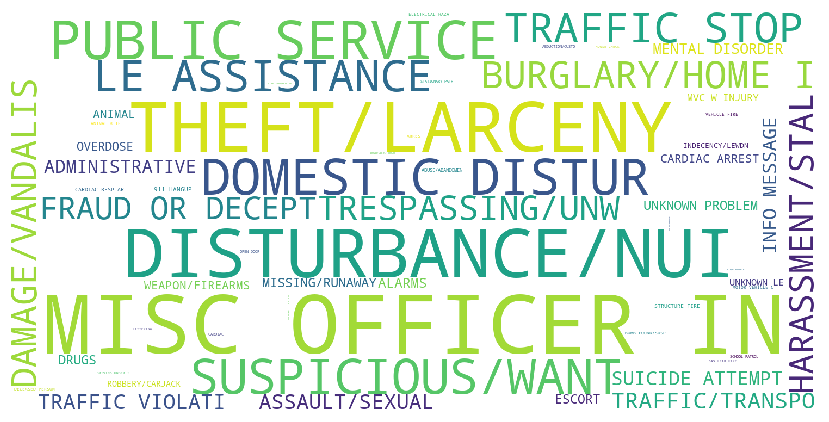

In [11]:
data_2018_2019_noage = pd.read_csv('data_2018_2019_noage.csv')
fig = plt.figure()

from wordcloud import WordCloud, STOPWORDS
from collections import Counter
reported_as = data_2018_2019_noage['Reported As'].dropna().tolist()
fig = plt.figure()

word_could_dict=Counter(reported_as)
wordcloud = WordCloud(width = 1500, height = 750,background_color='white').generate_from_frequencies(word_could_dict)

# display the word cloud
plt.imshow(wordcloud)
fig.set_figwidth(20)
fig.set_figheight(7.5)
plt.axis('off')
plt.show()

We can see 'HIGHWAY/ROAD/STREET ETC' word is the bigger and bolder. It is obvious that most incidents were reported near to roads. But, the second highest is **HOME VICTIMS**.

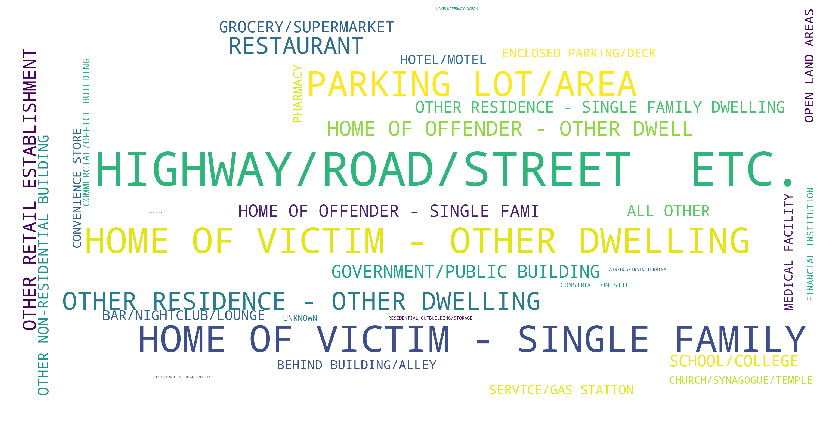

In [12]:
data_2018_2019_noage = pd.read_csv('data_2018_2019_noage.csv')
fig = plt.figure()

from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import matplotlib.pyplot as plt
premise = data_2018_2019_noage['Premise Description'].dropna().tolist()
word_could_dict=Counter(premise)
wordcloud = WordCloud(width = 3000, height = 1500,background_color='white').generate_from_frequencies(word_could_dict)

# display the word cloud
fig.set_figwidth(15)
fig.set_figheight(7.5)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The most third appearing offence type is **TRESPASSING**

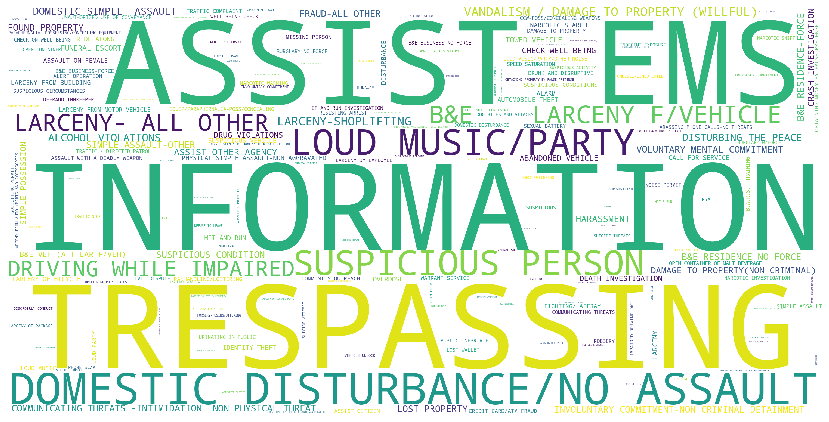

In [0]:
reported_as = data_2018_2019_noage['Offense'].dropna().tolist()

fig = plt.figure()

word_could_dict=Counter(reported_as)
wordcloud = WordCloud(width = 3000, height = 1500,background_color='white').generate_from_frequencies(word_could_dict)

# display the word cloud
fig.set_figwidth(15)
fig.set_figheight(7.5)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Number of Incidents with the Time
Here we consider only the zipcode 27514 which is having the **highest number of incidents** for the time range 2010-2019.
The histogram below provides the evidence.

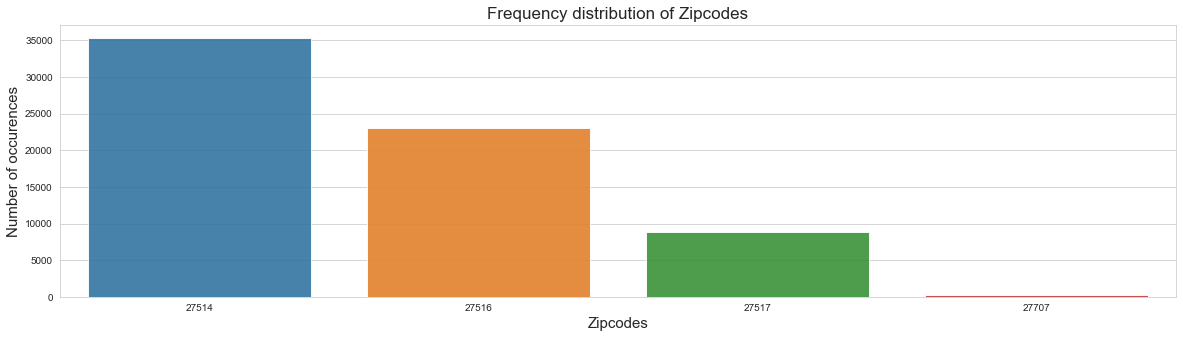

In [0]:
zip_count = incident_report['Zipcode'].dropna().value_counts().sort_values(ascending = False)[0:4]
plt.figure(figsize=(20,5))
sns.barplot(zip_count.index, zip_count.values, alpha=0.9)
plt.title('Frequency distribution of Zipcodes', fontsize='17')
plt.xlabel('Zipcodes', fontsize='15')
plt.ylabel('Number of occurences',fontsize='15')
plt.show()

### The Time series of the occurences from 2010-2019- monthly sum.

There is an obvious **up trend** from 2010 to the mid of 2016 and after there is a **down trend**.
And also a **seasionality pattern** in the occurebnces. Low at the begining of the year high in the summer.

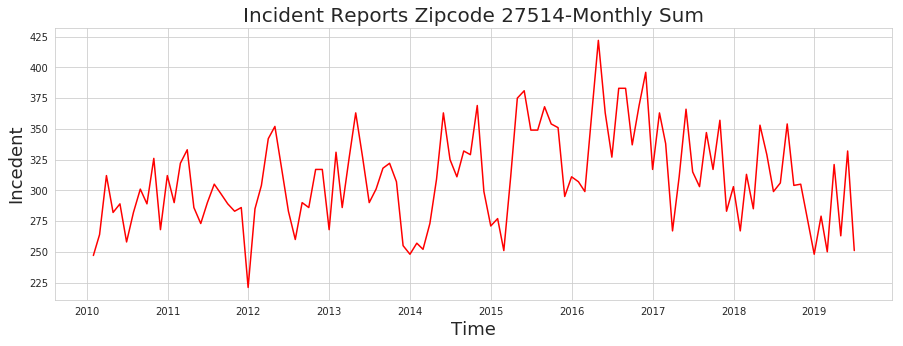

In [3]:
incident_report['Zipcode'].replace('', np.nan, inplace=True)
incident_report_zipcodes_nonull = pd.DataFrame()
incident_report_zipcodes_nonull['Zipcode'] = incident_report['Zipcode'].dropna()

incident_report_27514 = incident_report_zipcodes_nonull[incident_report_zipcodes_nonull['Zipcode']=="27514"]
incident_report_27514 = incident_report_27514.replace("27514", 1)
incident_report_27514_monthly = incident_report_27514.resample('m').sum()

#over all there is a upward trend on 
#seasionality in the incident report. Begining of the year low, summer high.
fig = plt.figure(figsize = (15,5))
plt.plot(incident_report_27514_monthly, color='red')
plt.title('Incident Reports Zipcode 27514-Monthly Sum', fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Incedent', fontsize=18)
plt.show()

### The time series of daily occurrencesn for the time range 2019-01-01---2019-06-29.

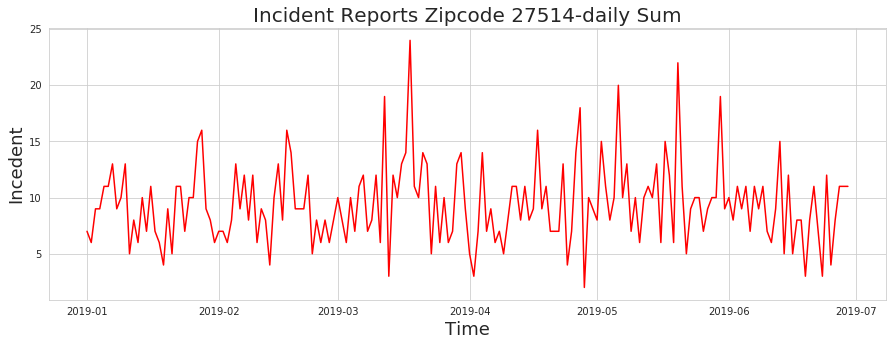

In [16]:
incident_report_27514 = incident_report_zipcodes_nonull[incident_report_zipcodes_nonull['Zipcode']=="27514"]
incident_report_27514 = incident_report_27514.replace("27514", 1)
incident_report_27514_daily = incident_report_27514.resample('d').sum()

fig = plt.figure(figsize = (15,5))
plt.plot(incident_report_27514_daily['2019-01-01':], color='red')
plt.title('Incident Reports Zipcode 27514-daily Sum', fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Incedent', fontsize=18)
plt.show()

# Time Series Prediction by Tensorflow
### To predict the number occurence of incidents, we used the tensorflow. The model belongs to from one of our team members.
<a href="https://github.com/akmuthun/stock_market_predictions_neural_net/blob/master/tesla_price_prediction_MLP.ipynb">Github Repository </a>

In [0]:
from math import sqrt
from numpy import array
from numpy import mean
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error

import tensorflow as tf

from pandas import Series, DataFrame

In [0]:
df = incident_report_27514_daily.reset_index()
df = df.drop('Date', axis=1)

In [19]:
data = df
#read time series dataset assume only one column = "univariate"
dataset = data

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
# n_in = n_input = width of the sliding window which the number of input time steps in one row 
# of the training data. We can decide the value of "n_input"
# in the main code when we specify configurations.

# transform list into supervised learning format
def series_to_supervised(data, n_in, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values


# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

# difference dataset
def difference(data, order):
	return [data[i] - data[i - order] for i in range(order, len(data))]

# fit a model
def model_fit(train, config, num_step):
	# unpack config
	n_input, n_nodes, n_epochs, n_batch, n_diff = config
	# prepare data
	if n_diff > 0:
		train = difference(train, n_diff)
	# transform series into supervised format
	data = series_to_supervised(train, n_in=n_input, n_out=num_step) 
	# separate inputs and outputs
	train_x, train_y = data[:, :-num_step], data[:, -num_step:] ##for train_y taking last three columns
	# define model
	model = tf.keras.Sequential([tf.keras.layers.Dense(n_nodes[0], activation='relu', input_dim=n_input),
	                             tf.keras.layers.Dense(n_nodes[1]),
															 tf.keras.layers.Dense(n_nodes[2]),
															 tf.keras.layers.Dense(n_nodes[3]),
															 tf.keras.layers.Dense(n_nodes[4]),
	                             tf.keras.layers.Dense(1)
															])
	model.compile(loss='mse', optimizer='adam')
	# fit model
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model

# forecast with the fit model
def model_predict(model, history, config):
	# unpack config
	n_input, _, _, _, n_diff = config
	# prepare data
	correction = 0.0
	if n_diff > 0:
		correction = history[-n_diff]
		history = difference(history, n_diff)
	# shape input for model
	x_input = array(history[-n_input:]).reshape((1, n_input))
	# make forecast
	yhat = model.predict(x_input, verbose=0)
	# correct forecast if it was differenced
	return correction + yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg, num_step):
	error_collection=list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# fit model
	model = model_fit(train, cfg, num_step)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)+1-num_step):
		# fit model and make forecast for history
		yhat = model_predict(model, history, cfg)
    #find error in each forecast 
		err = measure_rmse(test[i:i+num_step], yhat)
    #add error to collection
		error_collection.append(err)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction mean error
	error = mean(error_collection)
	#print(' > %.3f' % error)
	return error

# score a model, return None on failure
def repeat_evaluate(data, config, n_test, num_step, n_repeats=5):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config, num_step) for _ in range(n_repeats)]
	# summarize score
	result = mean(scores)
	return (result, config)

# grid search configs
def grid_search(data, cfg_list, n_test, num_step):
	# evaluate configs
	scores = [repeat_evaluate(data, cfg, n_test, num_step) for cfg in cfg_list]
	# sort configs by error, asc
	scores.sort()
	return scores

# create a list of configs to try
def model_configs():
	# define scope of configs
	n_input = [16,32]
	n_nodes = [[128,64, 32, 16, 8]]
	n_epochs = [1000]
	n_batch = [1024]
	n_diff = [0]
	# create configs
	configs = list()
	for i in n_input:
		for j in n_nodes:
			for k in n_epochs:
				for l in n_batch:
					for m in n_diff:
						cfg = [i, j, k, l, m]
						configs.append(cfg)
	print('Total configs: %d' % len(configs))
	return configs


# number of time steps in the test dataset 
n_test = 6 # keep this fixed

data = dataset.values
step_list = []
cfg_list = []
error_list = []
window_length_list = []
nodes_list = []
epochs_list = []
batch_size_list = []
diff_list =[]

n_test = 230
num_step = 1
for num in [num_step]:# number of steps to forecast, this can be any number between 1 and 5
	num_step = num 
	cfg_list = model_configs()
	scores = grid_search(data, cfg_list, n_test, num_step)
	print(scores)
	print('done for the step: %d' % num_step)
	error, cfg = scores[0]
	print(cfg, error)
	window_length_list.append(cfg[0])
	nodes_list.append(cfg[1])
	epochs_list.append(cfg[2])
	batch_size_list.append(cfg[3])
	diff_list.append(cfg[4])
	error_list.append(error)
	step_list.append(num_step)

collection = DataFrame()
collection['Predict Step'] = step_list
collection['Error'] = error_list
collection['window width'] = window_length_list
collection['Nodes'] = nodes_list
collection['Epochs'] = epochs_list
collection['batch size'] = batch_size_list
collection['difference'] = diff_list
collection.to_csv('TS.csv')

Total configs: 2
[(3.3569333400415338, [16, [128, 64, 32, 16, 8], 1000, 1024, 0]), (3.9053384772979696, [32, [128, 64, 32, 16, 8], 1000, 1024, 0])]
done for the step: 1
[16, [128, 64, 32, 16, 8], 1000, 1024, 0] 3.3569333400415338


In [0]:
n_input = 16
n_nodes = [128, 64, 32, 16, 8]
n_epochs = 1000
n_batch = 1024
num_step = 1
n_test = 230

n_in = n_input
n_out = num_step

data = df['Zipcode'].values

prepared_data = series_to_supervised(data, n_in, n_out)
train_x, train_y = prepared_data[:, :-num_step], prepared_data[:, -num_step:]
X_train, X_test = train_x[:-n_test,:], train_x[-n_test:,:]
y_train, y_test = train_y[:-n_test], train_y[-n_test:]

model = tf.keras.Sequential([tf.keras.layers.Dense(n_nodes[0], activation='relu', input_dim=n_input),
	                             tf.keras.layers.Dense(n_nodes[1]),
															 tf.keras.layers.Dense(n_nodes[2]),
															 tf.keras.layers.Dense(n_nodes[3]),
															 tf.keras.layers.Dense(n_nodes[4]),
	                             tf.keras.layers.Dense(1)
															])
model.compile(loss='mse', optimizer='adam')
# fit model
model.fit(X_train, y_train, epochs=n_epochs, batch_size=n_batch, verbose=0)
predictions = model.predict(X_test)

This result is not with fine tuned hyperparameters, the grid search code above can be used to adjust the n_nodes annd epochs also layers.

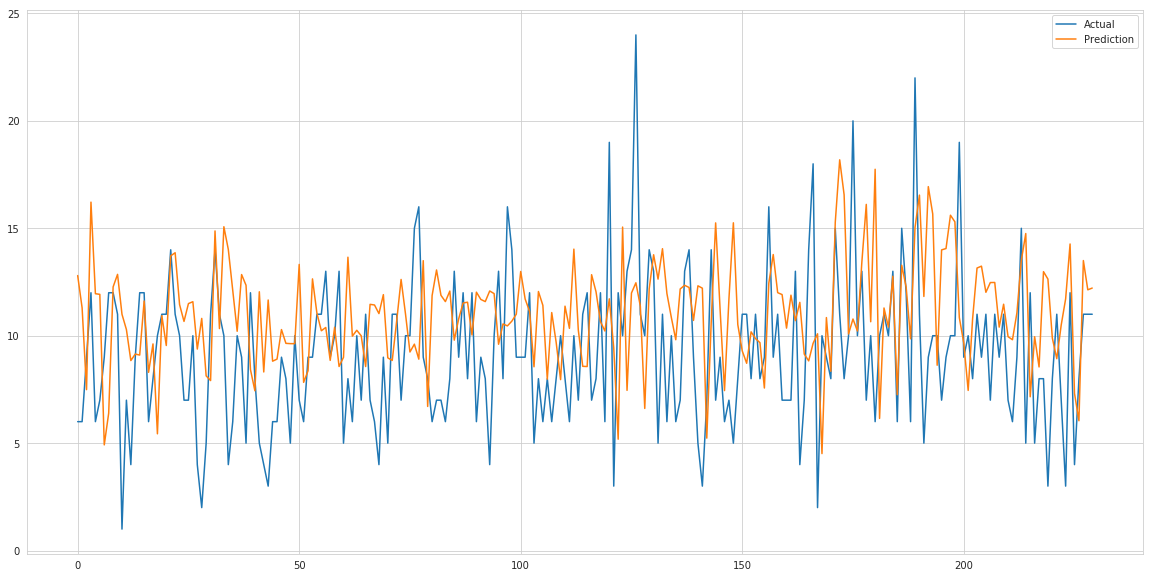

In [22]:
fig = plt.figure(figsize=(20, 10))
plt.plot(y_test)
plt.plot(predictions)
plt.legend(['Actual','Prediction'])
plt.show()